In [1]:
import silq
silq.initialize('Antimony')

%matplotlib notebook

Initializing imports
Initializing functions
Initializing instruments
Initializing parameters
Initializing data
Initialization complete


In [3]:
ramp_voltages(SRC=1.5/8, LB=3.72/8, RB=3.28/8, TG=14.4/8, TGAC=-6.3/8, DF=3.905/8, DS=5.17945/8)

# Turnon

In [2]:
vals = list(np.arange(0, 1.4, 0.002))
len(vals)

700

<IPython.core.display.Javascript object>


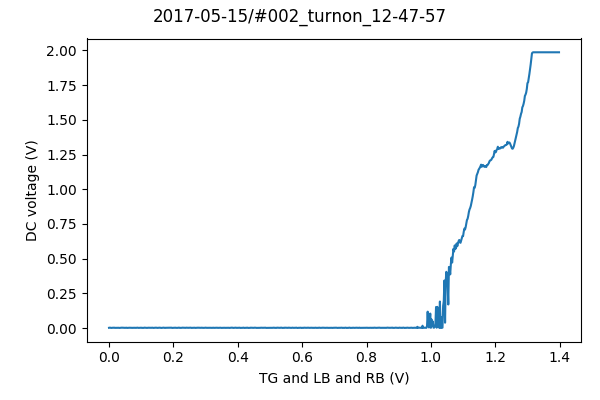

DataSet:
   data = load_data('2017-05-15/#002_turnon_12-47-57')
   <Type>   | <array_id>   | <array.name> | <array.shape>
   Setpoint | TG_LB_RB_set | TG_LB_RB     | (700,)
   Measured | DC_voltage   | DC_voltage   | (700,)
started at 2017-05-15 12:47:57


In [5]:
DC_parameter.setup()
loop = Loop(turnon_parameter[vals]).each(
    DC_parameter)
data = loop.get_data_set(name='turnon')
plot = loop.plot(data.DC_voltage)
loop.run();

layout.stop()

# Pinchoff

In [2]:
pinchoff_parameter = LB

vals = list(np.arange(1.25, 0, -0.002))

turnon_parameter(vals[0])
len(vals)

625

<IPython.core.display.Javascript object>


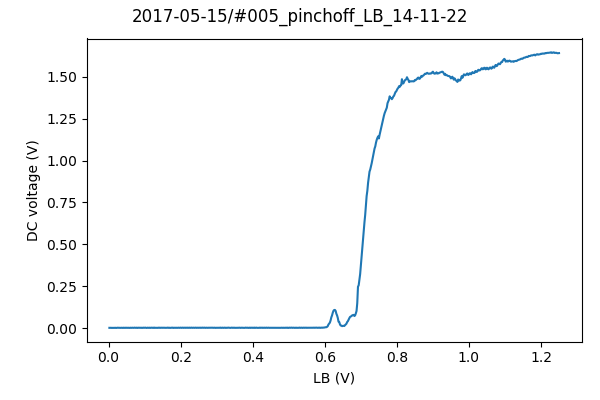

DataSet:
   data = load_data('2017-05-15/#005_pinchoff_LB_14-11-22')
   <Type>   | <array_id> | <array.name> | <array.shape>
   Setpoint | LB_set     | LB           | (625,)
   Measured | DC_voltage | DC_voltage   | (625,)
started at 2017-05-15 14:11:22


In [3]:
DC_parameter.setup()
loop = Loop(pinchoff_parameter[vals]).each(
    DC_parameter)
data = loop.get_data_set(name=f'pinchoff_{pinchoff_parameter.name}')
plot = loop.plot(data.DC_voltage)

loop.run();

layout.stop()

# 1D DC scan

In [27]:
vals = TG.sweep(1.5, 1.75, step=0.0005)
len(vals)

501

<IPython.core.display.Javascript object>


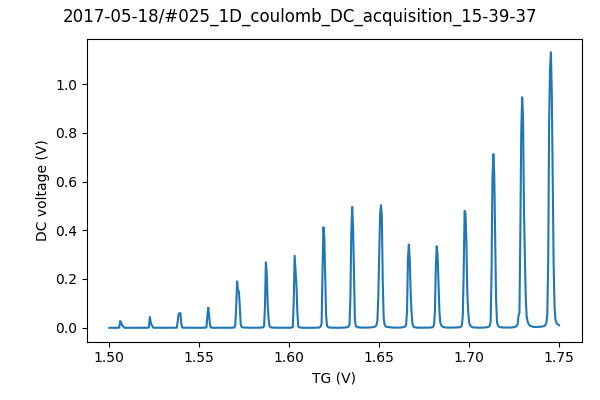

DataSet:
   data = load_data('2017-05-18/#025_1D_coulomb_DC_acquisition_15-39-37')
   <Type>   | <array_id> | <array.name> | <array.shape>
   Setpoint | TG_set     | TG           | (501,)
   Measured | DC_voltage | DC_voltage   | (501,)
Started at 2017-05-18 15:39:39
Finished at 2017-05-18 15:40:21


In [31]:
DC_parameter.setup()
loop = Loop(vals).each(
    DC_parameter)
data = loop.get_data_set(name=f'1D_coulomb_{parameter.name}')
plot = loop.plot(data.DC_voltage)
loop.run();

layout.stop()
vals.parameter(vals[0])

# 2D DC scan

In [50]:
x_vals = TGAC.sweep(-0.6, 0.6, num=400)
y_vals = DF.sweep(0, 0.8,  num=350)
print(f'Points: X{len(x_vals)} x Y{len(y_vals)}')

Points: X500 x Y500


In [48]:
DF(0.6)

<IPython.core.display.Javascript object>


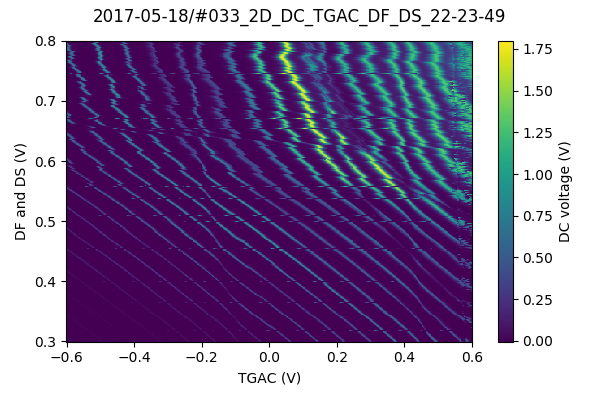

DataSet:
   data = load_data('2017-05-18/#033_2D_DC_TGAC_DF_DS_22-23-49')
   <Type>   | <array_id> | <array.name> | <array.shape>
   Setpoint | DF_DS_set  | DF_DS        | (500,)
   Setpoint | TGAC_set   | TGAC         | (500, 500)
   Measured | DC_voltage | DC_voltage   | (500, 500)
Started at 2017-05-18 22:23:50
Finished at 2017-05-19 15:24:19


In [51]:
DC_parameter.setup()
loop = Loop(y_vals).loop(
    x_vals).each(
        DC_parameter)
data = loop.get_data_set(name=f'2D_DC_{x_vals.name}_{y_vals.name}')
plot = loop[0].plot(data.DC_voltage)
loop.run()

layout.stop()
x_vals.parameter(x_vals[0])
y_vals.parameter(y_vals[0])

# Continuous single point scan

In [ ]:
DC_parameter.setup()
loop = Loop(dummy_parameter[0:5000:1], delay=0.2).each(DC_parameter)
data = loop.get_data_set(name='single_point_scan')
plot = loop.plot(data.DC_voltage)
loop.run()

# Variable read scan

In [58]:
read_pulse = variable_read_parameter.pulse_sequence['read']
read_voltage = parameters.AttributeParameter(read_pulse, attribute='amplitude')

In [60]:
variable_read_parameter.pulse_sequence['plunge'].amplitude = 0.02
variable_read_parameter.pulse_sequence['read'].amplitude = 0
variable_read_parameter.pulse_sequence['read'].duration = 50
variable_read_parameter.pulse_sequence['empty'].amplitude = -0.02
variable_read_parameter.pulse_sequence['empty'].t_start = 70
variable_read_parameter.pulse_sequence['final'].amplitude = -0.02
variable_read_parameter.pulse_sequence['final'].t_start = 90
variable_read_parameter.pulse_sequence

PulseSequence with 4 pulses, duration: 95
	DCPulse(plunge, A=0.02, t_start=0, t_stop=20)
	DCPulse(read, A=0, t_start=20, t_stop=70)
	DCPulse(empty, A=-0.02, t_start=70, t_stop=90)
	DCPulse(final, A=-0.02, t_start=90, t_stop=95)

In [11]:
variable_read_parameter.setup()

In [7]:
sim_gui()

<IPython.core.display.Javascript object>


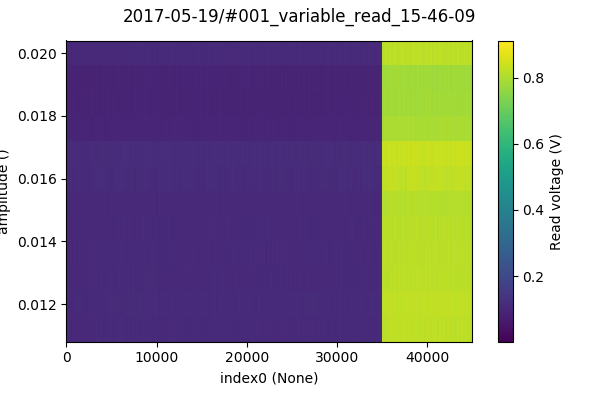

DataSet:
   data = load_data('2017-05-19/#001_variable_read_15-46-09')
   <Type>   | <array_id>    | <array.name> | <array.shape>
   Setpoint | amplitude_set | amplitude    | (51,)
   Setpoint | index0_set    | index0       | (51, 45008)
   Measured | read_voltage  | read_voltage | (51, 45008)
Started at 2017-05-19 15:46:10


In [ ]:
variable_read_parameter.samples = 100
variable_read_parameter.setup()
loop = Loop(read_voltage.sweep(0.02, -0.02, num=51)).each(
    variable_read_parameter)
data = loop.get_data_set(name=f'variable_read')
plot = loop.plot(data.read_voltage)
loop.run()

In [19]:
sim_gui()

# DC sweep

In [52]:
DC_sweep_parameter = parameters.DCSweepParameter()
DC_sweep_parameter.pulse_duration = .25
DC_sweep_parameter.final_delay = 120

DC_sweep_parameter.trace_pulse.enabled = True
DC_sweep_parameter.trace_pulse.connection_label = 'TGAC'

DC_sweep_parameter.add_sweep('TGAC', np.linspace(-0.015, 0.015, 21), connection_label='TGAC')
DC_sweep_parameter.add_sweep('DF', np.linspace(-0.015, 0.015, 21), connection_label='DF')

print(f'pulses: {len(DC_sweep_parameter.pulse_sequence)}')

pulses: 463


<IPython.core.display.Javascript object>


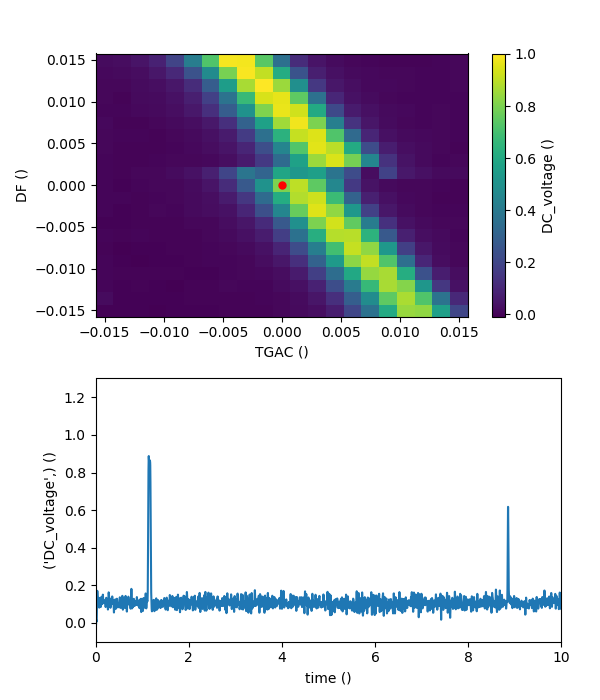

In [53]:
plot = DCSweepPlot(DC_sweep_parameter, auto_start=True)

In [56]:
plot[1].set_xlim(0, 10)

(0, 10)

In [54]:
sim_gui()

In [57]:
plot.stop()